In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
from yellowbrick.classifier import ROCAUC
import seaborn as sns

In [32]:
iris = pd.read_csv("penguins_train.csv")
df = pd.read_csv("penguins_train.csv")
iris

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,Biscoe,Yes,38.8,17.2,180.0,3800.0,MALE,9.63954,-25.29856,Adelie Penguin (Pygoscelis adeliae)
1,Torgersen,Yes,41.1,18.6,189.0,3325.0,MALE,9.32277,-26.09989,Adelie Penguin (Pygoscelis adeliae)
2,Biscoe,Yes,39.0,17.5,186.0,3550.0,FEMALE,8.57199,-26.07188,Adelie Penguin (Pygoscelis adeliae)
3,Dream,No,39.7,17.9,193.0,4250.0,MALE,9.25769,-25.88798,Adelie Penguin (Pygoscelis adeliae)
4,Biscoe,Yes,47.5,14.2,209.0,4600.0,FEMALE,8.39299,-26.78733,Gentoo penguin (Pygoscelis papua)
...,...,...,...,...,...,...,...,...,...,...
269,Biscoe,Yes,44.4,17.3,219.0,5250.0,MALE,8.13746,-26.79093,Gentoo penguin (Pygoscelis papua)
270,Dream,Yes,36.4,17.0,195.0,3325.0,FEMALE,9.17847,-25.23061,Adelie Penguin (Pygoscelis adeliae)
271,Dream,Yes,42.2,18.5,180.0,3550.0,FEMALE,8.04787,-25.49523,Adelie Penguin (Pygoscelis adeliae)
272,Biscoe,Yes,37.8,18.3,174.0,3400.0,FEMALE,8.73762,-25.09383,Adelie Penguin (Pygoscelis adeliae)


In [33]:
iris = iris.drop('Island', axis=1)
iris = iris.drop('Clutch Completion', axis=1)
iris.drop(iris[(iris['Sex'] != "MALE") & (iris['Sex'] != "FEMALE")].index, inplace = True)
iris.loc[iris['Sex'].eq('FEMALE'), 'Sex'] = '1'
iris.loc[iris['Sex'].eq('MALE'), 'Sex'] = '0'
iris = iris.dropna()
iris

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,38.8,17.2,180.0,3800.0,0,9.63954,-25.29856,Adelie Penguin (Pygoscelis adeliae)
1,41.1,18.6,189.0,3325.0,0,9.32277,-26.09989,Adelie Penguin (Pygoscelis adeliae)
2,39.0,17.5,186.0,3550.0,1,8.57199,-26.07188,Adelie Penguin (Pygoscelis adeliae)
3,39.7,17.9,193.0,4250.0,0,9.25769,-25.88798,Adelie Penguin (Pygoscelis adeliae)
4,47.5,14.2,209.0,4600.0,1,8.39299,-26.78733,Gentoo penguin (Pygoscelis papua)
...,...,...,...,...,...,...,...,...
269,44.4,17.3,219.0,5250.0,0,8.13746,-26.79093,Gentoo penguin (Pygoscelis papua)
270,36.4,17.0,195.0,3325.0,1,9.17847,-25.23061,Adelie Penguin (Pygoscelis adeliae)
271,42.2,18.5,180.0,3550.0,1,8.04787,-25.49523,Adelie Penguin (Pygoscelis adeliae)
272,37.8,18.3,174.0,3400.0,1,8.73762,-25.09383,Adelie Penguin (Pygoscelis adeliae)


In [34]:
iris['Culmen Length (mm)'] = (iris['Culmen Length (mm)']  - iris['Culmen Length (mm)'].min()) / (iris['Culmen Length (mm)'].max() - iris['Culmen Length (mm)'].min())
iris['Culmen Depth (mm)'] = (iris['Culmen Depth (mm)']  - iris['Culmen Depth (mm)'].min()) / (iris['Culmen Depth (mm)'].max() - iris['Culmen Depth (mm)'].min())
iris['Flipper Length (mm)'] = (iris['Flipper Length (mm)']  - iris['Flipper Length (mm)'].min()) / (iris['Flipper Length (mm)'].max() - iris['Flipper Length (mm)'].min())
iris['Body Mass (g)'] = (iris['Body Mass (g)']  - iris['Body Mass (g)'].min()) / (iris['Body Mass (g)'].max() - iris['Body Mass (g)'].min())
iris['Delta 15 N (o/oo)'] = (iris['Delta 15 N (o/oo)']  - iris['Delta 15 N (o/oo)'].min()) / (iris['Delta 15 N (o/oo)'].max() - iris['Delta 15 N (o/oo)'].min())
iris['Delta 13 C (o/oo)'] = (iris['Delta 13 C (o/oo)']  - iris['Delta 13 C (o/oo)'].min()) / (iris['Delta 13 C (o/oo)'].max() - iris['Delta 13 C (o/oo)'].min())
iris

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,0.243636,0.488095,0.135593,0.305556,0,0.839357,0.531516,Adelie Penguin (Pygoscelis adeliae)
1,0.327273,0.654762,0.288136,0.173611,0,0.706902,0.264963,Adelie Penguin (Pygoscelis adeliae)
2,0.250909,0.523810,0.237288,0.236111,1,0.392968,0.274280,Adelie Penguin (Pygoscelis adeliae)
3,0.276364,0.571429,0.355932,0.430556,0,0.679689,0.335452,Adelie Penguin (Pygoscelis adeliae)
4,0.560000,0.130952,0.627119,0.527778,1,0.318120,0.036294,Gentoo penguin (Pygoscelis papua)
...,...,...,...,...,...,...,...,...
269,0.447273,0.500000,0.796610,0.708333,0,0.211271,0.035097,Gentoo penguin (Pygoscelis papua)
270,0.156364,0.464286,0.389831,0.173611,1,0.646564,0.554119,Adelie Penguin (Pygoscelis adeliae)
271,0.367273,0.642857,0.135593,0.236111,1,0.173810,0.466096,Adelie Penguin (Pygoscelis adeliae)
272,0.207273,0.619048,0.033898,0.194444,1,0.462225,0.599617,Adelie Penguin (Pygoscelis adeliae)


In [36]:
x = iris.iloc[:, :7].values
y = iris['Species'].values

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

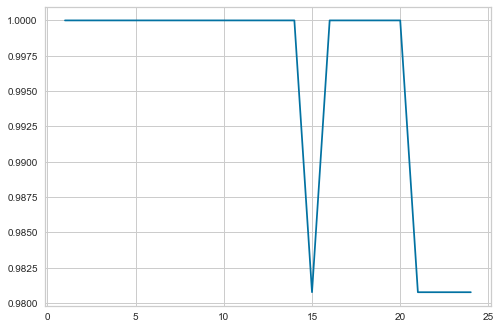

In [141]:
xaxis = []
clfScores = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    clfScores.append(knn.score(x_test, y_test))
    xaxis.append(i)
plt.plot(xaxis, clfScores)
plt.show()

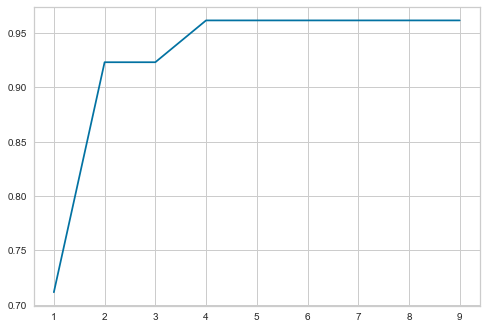

In [140]:
xaxis=[]
clfScores = []
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth = i, random_state = 42)
    clf.fit(x_train, y_train)
    clfScores.append(clf.score(x_test, y_test))
    xaxis.append(i)
plt.plot(xaxis, clfScores)  # Plot the chart
plt.show()

In [38]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print(gnb.score(x_test, y_test))

0.9807692307692307


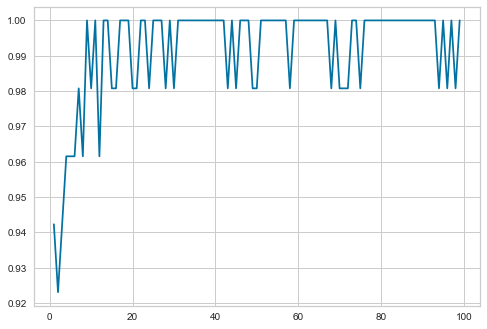

In [137]:
xaxis=[]
clfScores = []
for i in range(1,100):
    clf = RandomForestClassifier(n_estimators = i) 
    clf.fit(x_train, y_train)
    clfScores.append(clf.score(x_test, y_test))
    xaxis.append(i)
plt.plot(xaxis, clfScores)  # Plot the chart
plt.show()

In [39]:
clf1 = SVC(kernel='linear')
clf2 = SVC(kernel='poly')
clf3 = SVC(kernel='sigmoid')
clf4 = SVC(kernel='rbf')
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)
clf4.fit(x_train, y_train)
print(clf1.score(x_test, y_test), clf2.score(x_test, y_test), clf3.score(x_test, y_test), clf4.score(x_test, y_test))

1.0 1.0 0.5576923076923077 1.0


In [40]:
irisNotGentoo = iris.copy()
irisNotChinstrap = iris.copy()
irisNotAdelie = iris.copy()
irisNotGentoo.drop(irisNotGentoo[irisNotGentoo['Species'] == "Gentoo penguin (Pygoscelis papua)"].index, inplace = True)
irisNotChinstrap.drop(irisNotChinstrap[irisNotChinstrap['Species'] == "Chinstrap penguin (Pygoscelis antarctica)"].index, inplace = True)
irisNotAdelie.drop(irisNotAdelie[irisNotAdelie['Species'] == "Adelie Penguin (Pygoscelis adeliae)"].index, inplace = True)

In [41]:
xNotGentoo = irisNotGentoo.iloc[:, :7].values
xNotChinstrap = irisNotChinstrap.iloc[:, :7].values
xNotAdelie = irisNotAdelie.iloc[:, :7].values
yNotGentoo = irisNotGentoo['Species'].values
yNotChinstrap = irisNotChinstrap['Species'].values
yNotAdelie = irisNotAdelie['Species'].values

In [102]:
knnNotGentoo = KNeighborsClassifier(n_neighbors=7)
knnNotGentoo.fit(xNotGentoo, yNotGentoo)
print(knnNotGentoo.score(x_test, y_test))

0.6730769230769231


In [101]:
knnNotChinstrap = KNeighborsClassifier(n_neighbors=7)
knnNotChinstrap.fit(xNotChinstrap, yNotChinstrap)
print(knnNotChinstrap.score(x_test, y_test))

0.7307692307692307


In [100]:
knnNotAdelie = KNeighborsClassifier(n_neighbors=5)
knnNotAdelie.fit(xNotAdelie, yNotAdelie)
print(knnNotAdelie.score(x_test, y_test))

0.5961538461538461


In [143]:
print(x_test[0])

[0.4072727272727271 0.035714285714285796 0.6271186440677966
 0.4722222222222222 '1' 0.21084080417475098 0.5237985942713058]


In [107]:
X_test = []
for i in x_test:
    i = list(i)
    i[4] = int(i[4])
    X_test.append(i)

In [108]:
predicted = []

chinstrapCountTotal = 0
gentooCountTotal = 0
adelieCountTotal = 0

for i in range(len(X_test)):
    
    chinstrapCount = 0
    gentooCount = 0
    adelieCount = 0
    
    varNotChinstrap = knnNotChinstrap.predict([X_test[i]])
    if varNotChinstrap[0] == 'Gentoo penguin (Pygoscelis papua)':
        gentooCount += 1
    elif varNotChinstrap[0] == 'Adelie Penguin (Pygoscelis adeliae)':
        adelieCount += 1
    
    varNotAdelie = knnNotAdelie.predict([X_test[i]])
    if varNotAdelie[0] == 'Gentoo penguin (Pygoscelis papua)':
        gentooCount += 1
    elif varNotAdelie[0] == 'Chinstrap penguin (Pygoscelis antarctica)':
        chinstrapCount += 1
        
    varNotGentoo = knnNotGentoo.predict([X_test[i]])
    if varNotGentoo[0] == 'Chinstrap penguin (Pygoscelis antarctica)':
        chinstrapCount += 1
    elif varNotGentoo[0] == 'Adelie Penguin (Pygoscelis adeliae)':
        adelieCount += 1

    chinstrapCountTotal += chinstrapCount
    gentooCountTotal += gentooCount
    adelieCountTotal += adelieCount
        
    if adelieCount == 2: 
        predicted.append('Adelie Penguin (Pygoscelis adeliae)')
    elif chinstrapCount == 2:
        predicted.append('Chinstrap penguin (Pygoscelis antarctica)')
    elif gentooCount == 2:
        predicted.append('Gentoo penguin (Pygoscelis papua)')
    else:
        predicted.append('Emperor penguin (Aptenodytes forsteri)')
        
print(predicted)

['Gentoo penguin (Pygoscelis papua)', 'Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)', 'Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)', 'Gentoo penguin (Pygoscelis papua)', 'Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)', 'Gentoo penguin (Pygoscelis papua)', 'Adelie Penguin (Pygoscelis adeliae)', 'Adelie Penguin (Pygoscelis adeliae)', 'Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Gentoo penguin (Pygoscelis papua)', 'Gentoo penguin (Pygoscelis papua)', 'Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)', 'Adelie Penguin (Pygoscelis adeliae)', 'Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Pe

In [152]:
upload = []
for i in range(len(predicted)):
    array = []
    array += X_test[i]
    array += [predicted[i]]
    upload.append(array)

[[0.4072727272727271, 0.035714285714285796, 0.6271186440677966, 0.4722222222222222, 1, 0.21084080417475098, 0.5237985942713058, 'Gentoo penguin (Pygoscelis papua)'], [0.35999999999999993, 0.7619047619047619, 0.4745762711864407, 0.375, 0, 0.35489981267143894, 0.193542163544858, 'Adelie Penguin (Pygoscelis adeliae)'], [0.5963636363636363, 0.5238095238095238, 0.3220338983050847, 0.19444444444444445, 0, 0.750342878169532, 0.8757330512562076, 'Chinstrap penguin (Pygoscelis antarctica)'], [0.24363636363636348, 0.5357142857142859, 0.3220338983050847, 0.1597222222222222, 1, 0.5221700006690301, 0.3323154606871634, 'Adelie Penguin (Pygoscelis adeliae)'], [0.2727272727272727, 0.6785714285714287, 0.3050847457627119, 0.5277777777777778, 0, 0.7772713588010965, 0.9293543161459218, 'Adelie Penguin (Pygoscelis adeliae)'], [0.4109090909090908, 0.15476190476190485, 0.7796610169491526, 0.5277777777777778, 1, 0.25192346290225487, 0.2363227521147464, 'Gentoo penguin (Pygoscelis papua)'], [0.6181818181818182

In [109]:
predictedNotGentoo = []
predictedNotChinstrap = []
predictedNotAdelie = []

for i in range(len(X_test)):
        
    predictedNotChinstrap.append(knnNotChinstrap.predict([X_test[i]])[0])
    predictedNotGentoo.append(knnNotGentoo.predict([X_test[i]])[0])
    predictedNotAdelie.append(knnNotAdelie.predict([X_test[i]])[0])

In [110]:
print(len(predicted))

52


In [113]:
print(metrics.f1_score(y_test, predicted, average=None))
print(metrics.f1_score(y_test, predicted, average='micro'))
print(metrics.f1_score(y_test, predicted, average='macro'))
print(metrics.f1_score(y_test, predicted, average='weighted'))

[1. 1. 1.]
1.0
1.0
1.0


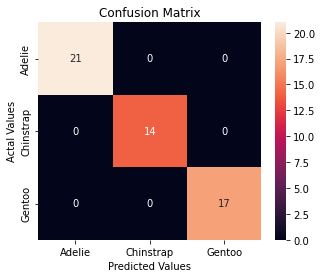

In [115]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['Adelie','Chinstrap','Gentoo'], 
                     columns = ['Adelie','Chinstrap','Gentoo'])
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show()
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = ['Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Gentoo penguin (Pygoscelis papua)']
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
#     ax = plt.subplot(2, 3, i+1)
#     sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
#     ax.set_title(c)
#     ax.legend([f"Class: {c}", "Rest"])
#     ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

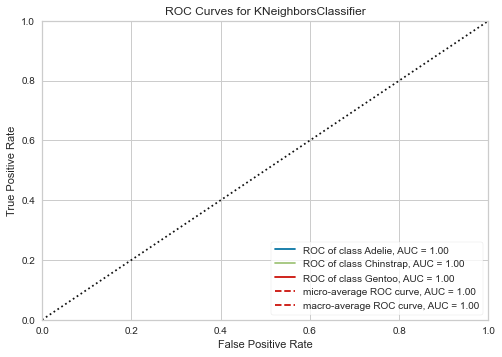

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [132]:
visualizer = ROCAUC(KNeighborsClassifier(), encoder={'Adelie Penguin (Pygoscelis adeliae)': 'Adelie', 'Chinstrap penguin (Pygoscelis antarctica)': 'Chinstrap', 'Gentoo penguin (Pygoscelis papua)': 'Gentoo'})
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [284]:
irisOHE = pd.get_dummies(iris, prefix="", prefix_sep="", columns=['Species'])
irisOHE

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua)
0,0.243636,0.488095,0.135593,0.305556,0,0.839357,0.531516,1,0,0
1,0.327273,0.654762,0.288136,0.173611,0,0.706902,0.264963,1,0,0
2,0.250909,0.523810,0.237288,0.236111,1,0.392968,0.274280,1,0,0
3,0.276364,0.571429,0.355932,0.430556,0,0.679689,0.335452,1,0,0
4,0.560000,0.130952,0.627119,0.527778,1,0.318120,0.036294,0,0,1
...,...,...,...,...,...,...,...,...,...,...
269,0.447273,0.500000,0.796610,0.708333,0,0.211271,0.035097,0,0,1
270,0.156364,0.464286,0.389831,0.173611,1,0.646564,0.554119,1,0,0
271,0.367273,0.642857,0.135593,0.236111,1,0.173810,0.466096,1,0,0
272,0.207273,0.619048,0.033898,0.194444,1,0.462225,0.599617,1,0,0
